In [284]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

In [285]:
df = pd.read_csv("Housing.csv")
df.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished


In [286]:
yes_no_columns = [
    'mainroad', 'guestroom', 'basement',
    'hotwaterheating', 'airconditioning', 'prefarea'
]

for col in yes_no_columns:
    df[col] = df[col].map({'yes': True, 'no': False})

In [287]:
df[yes_no_columns].head()

,mainroad,guestroom,basement,hotwaterheating,airconditioning,prefarea
0,True,False,False,False,True,True
1,True,False,False,False,True,False
2,True,False,True,False,False,True
3,True,False,True,False,True,True
4,True,True,True,False,True,False


In [288]:
df['furnishingstatus'] = df['furnishingstatus'].map({
    'furnished': 2,
    'semi-furnished': 1,
    'unfurnished': 0
})

In [289]:
df.isnull().sum()

price               0
area                0
bedrooms            0
bathrooms           0
stories             0
mainroad            0
guestroom           0
basement            0
hotwaterheating     0
airconditioning     0
parking             0
prefarea            0
furnishingstatus    0
dtype: int64

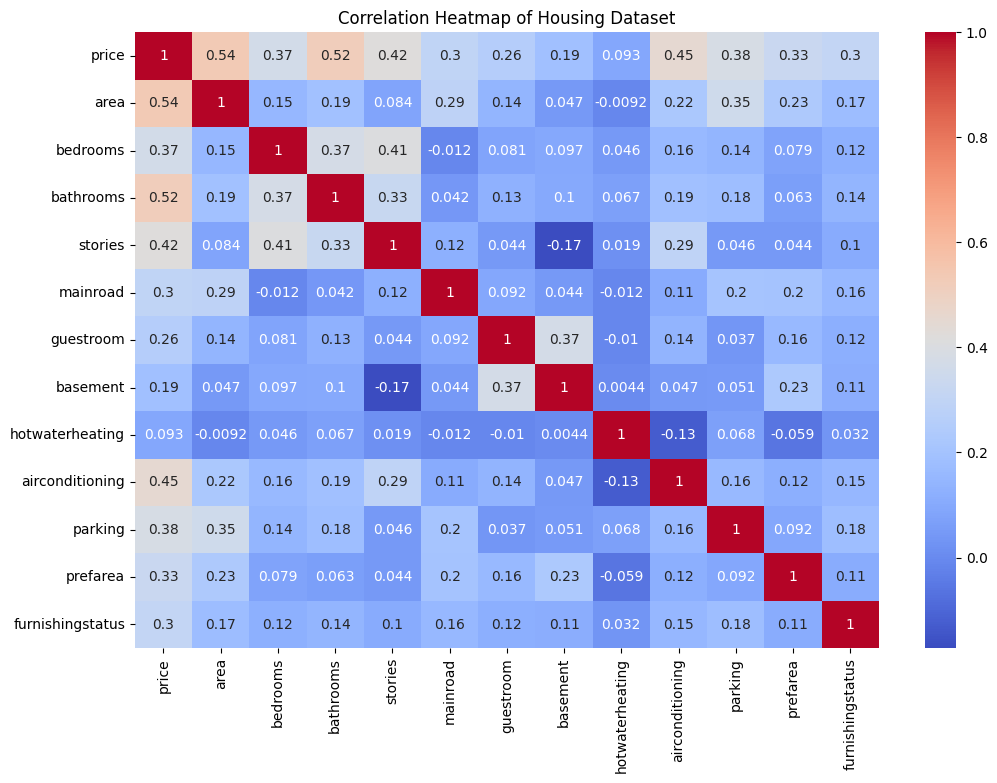

In [290]:
plt.figure(figsize=(12, 8))
sns.heatmap(df.corr(), annot=True, cmap="coolwarm")
plt.title("Correlation Heatmap of Housing Dataset")
plt.show()

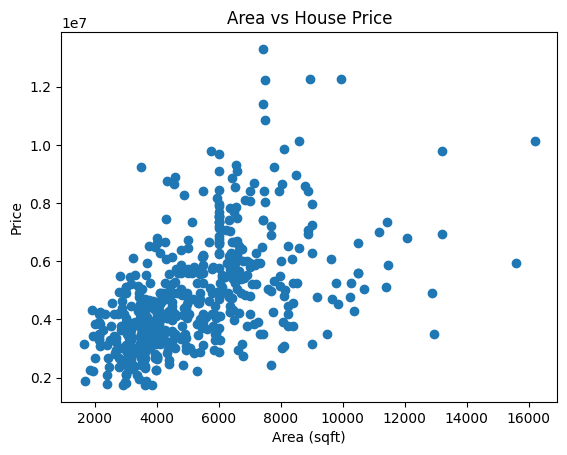

In [291]:
plt.scatter(df['area'], df['price'])
plt.xlabel("Area (sqft)")
plt.ylabel("Price")
plt.title("Area vs House Price")
plt.show()

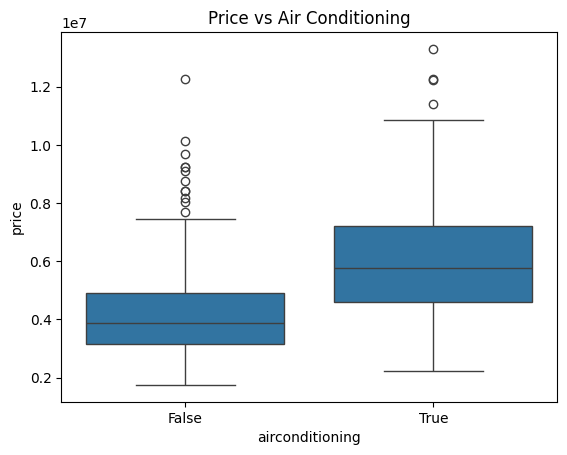

In [292]:
sns.boxplot(x=df['airconditioning'], y=df['price'])
plt.title("Price vs Air Conditioning")
plt.show()

In [293]:
X = df.drop('price', axis=1)
y = df['price']

In [294]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [295]:
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.2, random_state=42
)

In [296]:
model = LinearRegression()
model.fit(X_train, y_train)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [297]:
y_pred = model.predict(X_test)
print(f"Accuracy Score: {r2_score(y_test, y_pred)*100 :.3f}")

Accuracy Score: 64.948


In [298]:
feature_importance = pd.DataFrame({
    'Feature': X.columns,
    'Coefficient': model.coef_
})

feature_importance['Abs_Coefficient'] = feature_importance['Coefficient'].abs()
feature_importance = feature_importance.sort_values(
    by='Abs_Coefficient', ascending=False
)

feature_importance

,Feature,Coefficient,Abs_Coefficient
2,bathrooms,550762.108735,550762.108735
0,area,511355.314864,511355.314864
8,airconditioning,365086.933939,365086.933939
3,stories,352072.086344,352072.086344
10,prefarea,267023.364350,267023.364350
9,parking,194330.065331,194330.065331
6,basement,187581.884388,187581.884388
11,furnishingstatus,160043.584438,160043.584438
7,hotwaterheating,143909.241493,143909.241493
4,mainroad,127770.253636,127770.253636


In [299]:
feature_importance[['Feature', 'Coefficient']].head(12)

,Feature,Coefficient
2,bathrooms,550762.108735
0,area,511355.314864
8,airconditioning,365086.933939
3,stories,352072.086344
10,prefarea,267023.364350
9,parking,194330.065331
6,basement,187581.884388
11,furnishingstatus,160043.584438
7,hotwaterheating,143909.241493
4,mainroad,127770.253636
